In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.6/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [2]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
# filt_list = ['jwst,F162M', 'jwst,F182M', 'jwst,F200W', 'jwst,F212N']
filters = ['m_jwst_F162M', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [11]:
# read nbody data
path_to_data = '../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma0p1/fiducial/sfe_ff001/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 20)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

        mass         isMultiple ...       log_a               age        
-------------------- ---------- ... ------------------ ------------------
 0.06895842179945424        0.0 ...                nan  18.62630555946738
 0.08626887187757219        0.0 ...                nan  3.069082513027311
   2.326448478984193        0.0 ...                nan  18.33038253724003
 0.04093112166717806        0.0 ...                nan  3.069082513027311
 0.12120750486036917        0.0 ...                nan 3.8325701628119546
0.030672437361009684        0.0 ...                nan 3.8325701628119546
0.038397156098594086        0.0 ...                nan  11.41339149145218
  0.9778833957370643        0.0 ...                nan 16.112574745369784
 0.13641146028342271        0.0 ...                nan 16.149288533963723
 0.06032785968948606        0.0 ...                nan 16.149288533963723
                 ...        ... ...                ...                ...
  0.4204697137805375        1.0 ... 3.

In [12]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.39794001 6.47712125 6.54406804 6.60205999 6.65321251 6.69897
 6.74036269 6.77815125 6.81291336 6.84509804 6.87506126 6.90308999
 6.92941893 6.95424251 6.97772361 7.         7.0211893  7.04139269
 7.06069784 7.07918125 7.09691001 7.11394335 7.13033377 7.14612804
 7.161368   7.17609126 7.1903317  7.20411998 7.21748394 7.23044892
 7.24303805 7.25527251 7.26717173 7.2787536  7.29003461 7.30103
 7.31175386]
[ 2500000.  3000000.  3500000.  4000000.  4500000.  5000000.  5500000.
  6000000.  6500000.  7000000.  7500000.  8000000.  8500000.  9000000.
  9500000. 10000000. 10500000. 11000000. 11500000. 12000000. 12500000.
 13000000. 13500000. 14000000. 14500000. 15000000. 15500000. 16000000.
 16500000. 17000000. 17500000. 18000000. 18500000. 19000000. 19500000.
 20000000. 20500000.]


In [13]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filters,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Changing to logg=4.50 for T= 39293 logg=4.00
Changing to logg=4.50 for T= 39737 logg=3.99
Changing to logg=4.50 for T= 40206 logg=3.98
Changing to logg=4.50 for T= 40487 logg=3.97
Changing to logg=4.50 for T= 40764 logg=3.97
Changing to logg=4.50 for T= 41036 logg=3.95
Changing to logg=4.50 for T= 41298 logg=3.94
Changing to logg=4.50 for T= 41548 logg=3.93
Changing to logg=4.50 for T= 41810 logg=3.92
Changing to logg=4.50 for T= 42053 logg=3.90
Changing to logg=4.50 for T= 42247 logg=3.88
Changing to logg=4.50 for T= 42389 logg=3.86
Changing to logg=4.50 for T= 42598 logg=3.83
Changing to logg=4.50 for T= 43046 logg=3.82
Changing to logg=4.50 for T= 44070 logg=3.81
Changing to logg=4.50 for T= 44382 logg=3.80
Changing to logg=4.50 for T= 44435 logg=3.80
Changing to logg=4.50 for T= 44490 logg=3.79
Changing to logg=4.50 for T= 44532 logg=3.78
Changing to T= 50000 for T= 55470 logg=4.05
Changing to logg=5.00 for T= 55470 logg=4.05
Changing to T= 50000 for T= 56402 logg=4.07
Changing to 

Changing to T= 50000 for T= 64182 logg=4.22
Changing to logg=5.00 for T= 64182 logg=4.22
Changing to T= 50000 for T= 64642 logg=4.23
Changing to logg=5.00 for T= 64642 logg=4.23
Changing to T= 50000 for T= 65056 logg=4.24
Changing to logg=5.00 for T= 65056 logg=4.24
Changing to T= 50000 for T= 65507 logg=4.25
Changing to logg=5.00 for T= 65507 logg=4.25
Changing to T= 50000 for T= 65983 logg=4.26
Changing to logg=5.00 for T= 65983 logg=4.26
Changing to T= 50000 for T= 66485 logg=4.27
Changing to logg=5.00 for T= 66485 logg=4.27
Changing to T= 50000 for T= 67022 logg=4.28
Changing to logg=5.00 for T= 67022 logg=4.28
Changing to T= 50000 for T= 67541 logg=4.29
Changing to logg=5.00 for T= 67541 logg=4.29
Changing to T= 50000 for T= 68089 logg=4.30
Changing to logg=5.00 for T= 68089 logg=4.30
Changing to T= 50000 for T= 68666 logg=4.32
Changing to logg=5.00 for T= 68666 logg=4.32
Changing to T= 50000 for T= 69275 logg=4.33
Changing to logg=5.00 for T= 69275 logg=4.33
Changing to T= 50000 

Changing to T= 50000 for T=112653 logg=5.10
Changing to logg=5.00 for T=112653 logg=5.10
Changing to T= 50000 for T=112650 logg=5.10
Changing to logg=5.00 for T=112650 logg=5.10
Changing to T= 50000 for T=112648 logg=5.09
Changing to logg=5.00 for T=112648 logg=5.09
Changing to T= 50000 for T=112645 logg=5.09
Changing to logg=5.00 for T=112645 logg=5.09
Changing to T= 50000 for T=112642 logg=5.09
Changing to logg=5.00 for T=112642 logg=5.09
Changing to T= 50000 for T=112637 logg=5.09
Changing to logg=5.00 for T=112637 logg=5.09
Changing to T= 50000 for T=112630 logg=5.09
Changing to logg=5.00 for T=112630 logg=5.09
Changing to T= 50000 for T=112623 logg=5.09
Changing to logg=5.00 for T=112623 logg=5.09
Changing to T= 50000 for T=112616 logg=5.09
Changing to logg=5.00 for T=112616 logg=5.09
Changing to T= 50000 for T=112607 logg=5.09
Changing to logg=5.00 for T=112607 logg=5.09
Changing to T= 50000 for T=112597 logg=5.09
Changing to logg=5.00 for T=112597 logg=5.09
Changing to T= 50000 

Changing to T= 50000 for T=110382 logg=5.03
Changing to logg=5.00 for T=110382 logg=5.03
Changing to T= 50000 for T=110350 logg=5.03
Changing to logg=5.00 for T=110350 logg=5.03
Changing to T= 50000 for T=110318 logg=5.03
Changing to logg=5.00 for T=110318 logg=5.03
Changing to T= 50000 for T=110286 logg=5.02
Changing to logg=5.00 for T=110286 logg=5.02
Changing to T= 50000 for T=110254 logg=5.02
Changing to logg=5.00 for T=110254 logg=5.02
Changing to T= 50000 for T=110223 logg=5.02
Changing to logg=5.00 for T=110223 logg=5.02
Changing to T= 50000 for T=110191 logg=5.02
Changing to logg=5.00 for T=110191 logg=5.02
Changing to T= 50000 for T=110159 logg=5.02
Changing to logg=5.00 for T=110159 logg=5.02
Changing to T= 50000 for T=110128 logg=5.02
Changing to logg=5.00 for T=110128 logg=5.02
Changing to T= 50000 for T=110096 logg=5.02
Changing to logg=5.00 for T=110096 logg=5.02
Changing to T= 50000 for T=110065 logg=5.02
Changing to logg=5.00 for T=110065 logg=5.02
Changing to T= 50000 

M =   2.639 Msun  T =  9360 K  m_jwst_F162M = 8.30
M =   7.445 Msun  T = 21404 K  m_jwst_F162M = 7.21
M = 103.009 Msun  T = 58412 K  m_jwst_F162M = 3.53
M = 139.953 Msun  T = 112608 K  m_jwst_F162M = 6.58
M = 140.007 Msun  T = 110414 K  m_jwst_F162M = 6.41
Starting filter: jwst,F182M   Elapsed time: 31.27 seconds
Starting synthetic photometry
M =   0.103 Msun  T =  2991 K  m_jwst_F182M = 13.93
M =   2.639 Msun  T =  9360 K  m_jwst_F182M = 8.30
M =   7.445 Msun  T = 21404 K  m_jwst_F182M = 7.25
M = 103.009 Msun  T = 58412 K  m_jwst_F182M = 3.59
M = 139.953 Msun  T = 112608 K  m_jwst_F182M = 6.65
M = 140.007 Msun  T = 110414 K  m_jwst_F182M = 6.47
Starting filter: jwst,F200W   Elapsed time: 62.37 seconds
Starting synthetic photometry
M =   0.103 Msun  T =  2991 K  m_jwst_F200W = 13.87
M =   2.639 Msun  T =  9360 K  m_jwst_F200W = 8.30
M =   7.445 Msun  T = 21404 K  m_jwst_F200W = 7.27
M = 103.009 Msun  T = 58412 K  m_jwst_F200W = 3.62
M = 139.953 Msun  T = 112608 K  m_jwst_F200W = 6.67
M

Changing to T= 50000 for T=101686 logg=4.99
Changing to logg=5.00 for T=101686 logg=4.99
Changing to T= 50000 for T=102467 logg=5.00
Changing to logg=5.00 for T=102467 logg=5.00
Changing to T= 50000 for T=103192 logg=5.01
Changing to logg=5.00 for T=103192 logg=5.01
Changing to T= 50000 for T=103790 logg=5.01
Changing to logg=5.00 for T=103790 logg=5.01
Changing to T= 50000 for T=104049 logg=5.01
Changing to logg=5.00 for T=104049 logg=5.01
Changing to T= 50000 for T=104025 logg=5.01
Changing to logg=5.00 for T=104025 logg=5.01
Changing to T= 50000 for T=104002 logg=5.01
Changing to logg=5.00 for T=104002 logg=5.01
Changing to T= 50000 for T=103978 logg=5.00
Changing to logg=5.00 for T=103978 logg=5.00
Changing to T= 50000 for T=103955 logg=5.00
Changing to logg=5.00 for T=103955 logg=5.00
Changing to T= 50000 for T=103931 logg=5.00
Changing to logg=5.00 for T=103931 logg=5.00
Changing to T= 50000 for T=103908 logg=5.00
Changing to logg=5.00 for T=103908 logg=5.00
Changing to T= 50000 

Changing to T= 50000 for T= 98182 logg=4.84
Changing to logg=5.00 for T= 98182 logg=4.84
Changing to T= 50000 for T= 98100 logg=4.84
Changing to logg=5.00 for T= 98100 logg=4.84
Changing to T= 50000 for T= 98019 logg=4.83
Changing to logg=5.00 for T= 98019 logg=4.83
Changing to T= 50000 for T= 97937 logg=4.83
Changing to logg=5.00 for T= 97937 logg=4.83
Changing to T= 50000 for T= 97855 logg=4.83
Changing to logg=5.00 for T= 97855 logg=4.83
Changing to T= 50000 for T= 97773 logg=4.83
Changing to logg=5.00 for T= 97773 logg=4.83
Changing to T= 50000 for T= 97690 logg=4.83
Changing to logg=5.00 for T= 97690 logg=4.83
Changing to T= 50000 for T= 97608 logg=4.82
Changing to logg=5.00 for T= 97608 logg=4.82
Changing to T= 50000 for T= 97525 logg=4.82
Changing to logg=5.00 for T= 97525 logg=4.82
Changing to T= 50000 for T= 97443 logg=4.82
Changing to logg=5.00 for T= 97443 logg=4.82
Changing to T= 50000 for T= 97360 logg=4.82
Changing to logg=5.00 for T= 97360 logg=4.82
Changing to T= 50000 

Changing to T= 50000 for T=126076 logg=5.33
Changing to logg=5.00 for T=126076 logg=5.33
Changing to T= 50000 for T=126738 logg=5.34
Changing to logg=5.00 for T=126738 logg=5.34
Changing to T= 50000 for T=127385 logg=5.35
Changing to logg=5.00 for T=127385 logg=5.35
Changing to T= 50000 for T=128018 logg=5.37
Changing to logg=5.00 for T=128018 logg=5.37
Changing to T= 50000 for T=128640 logg=5.38
Changing to logg=5.00 for T=128640 logg=5.38
Changing to T= 50000 for T=129256 logg=5.40
Changing to logg=5.00 for T=129256 logg=5.40
Changing to T= 50000 for T=129903 logg=5.41
Changing to logg=5.00 for T=129903 logg=5.41
Changing to T= 50000 for T=130641 logg=5.43
Changing to logg=5.00 for T=130641 logg=5.43
Changing to T= 50000 for T=131497 logg=5.44
Changing to logg=5.00 for T=131497 logg=5.44
Changing to T= 50000 for T=132392 logg=5.45
Changing to logg=5.00 for T=132392 logg=5.45
Changing to T= 50000 for T=133022 logg=5.46
Changing to logg=5.00 for T=133022 logg=5.46
Changing to T= 50000 

Changing to T= 50000 for T=179365 logg=5.93
Changing to logg=5.00 for T=179365 logg=5.93
Changing to T= 50000 for T=180249 logg=5.93
Changing to logg=5.00 for T=180249 logg=5.93
Changing to T= 50000 for T=181136 logg=5.94
Changing to logg=5.00 for T=181136 logg=5.94
Changing to T= 50000 for T=182026 logg=5.95
Changing to logg=5.00 for T=182026 logg=5.95
Changing to T= 50000 for T=182919 logg=5.95
Changing to logg=5.00 for T=182919 logg=5.95
Changing to T= 50000 for T=183816 logg=5.96
Changing to logg=5.00 for T=183816 logg=5.96
Changing to T= 50000 for T=184715 logg=5.97
Changing to logg=5.00 for T=184715 logg=5.97
Changing to T= 50000 for T=185618 logg=5.97
Changing to logg=5.00 for T=185618 logg=5.97
Changing to T= 50000 for T=186523 logg=5.98
Changing to logg=5.00 for T=186523 logg=5.98
Changing to T= 50000 for T=187431 logg=5.99
Changing to logg=5.00 for T=187431 logg=5.99
Changing to T= 50000 for T=188341 logg=5.99
Changing to logg=5.00 for T=188341 logg=5.99
Changing to T= 50000 

M =   2.480 Msun  T =  9305 K  m_jwst_F200W = 8.50
M =   7.102 Msun  T = 20870 K  m_jwst_F200W = 7.35
M =  60.191 Msun  T = 32202 K  m_jwst_F200W = 1.98
M = 103.609 Msun  T = 103006 K  m_jwst_F200W = 6.60
M = 103.840 Msun  T = 95284 K  m_jwst_F200W = 6.10
M = 128.739 Msun  T = 137586 K  m_jwst_F200W = 8.71
M = 131.855 Msun  T = 220472 K  m_jwst_F200W = 10.43
Starting filter: jwst,F212N   Elapsed time: 118.20 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2984 K  m_jwst_F212N = 13.92
M =   2.480 Msun  T =  9305 K  m_jwst_F212N = 8.50
M =   7.102 Msun  T = 20870 K  m_jwst_F212N = 7.37
M =  60.191 Msun  T = 32202 K  m_jwst_F212N = 2.01
M = 103.609 Msun  T = 103006 K  m_jwst_F212N = 6.63
M = 103.840 Msun  T = 95284 K  m_jwst_F212N = 6.13
M = 128.739 Msun  T = 137586 K  m_jwst_F212N = 8.74
M = 131.855 Msun  T = 220472 K  m_jwst_F212N = 10.46
      Time taken: 157.25 seconds
Changing to logg=4.00 for T= 33418 logg=4.00
Changing to logg=4.00 for T= 33696 logg=3.99
Changing to lo

Changing to logg=2.50 for T= 14114 logg=1.69
Changing to logg=2.50 for T= 14021 logg=1.68
Changing to logg=2.50 for T= 13928 logg=1.66
Changing to logg=2.50 for T= 13836 logg=1.65
Changing to logg=2.50 for T= 13744 logg=1.64
Changing to logg=2.50 for T= 13653 logg=1.63
Changing to logg=2.50 for T= 13563 logg=1.62
Changing to logg=2.50 for T= 13473 logg=1.61
Changing to logg=2.50 for T= 13383 logg=1.59
Changing to logg=2.50 for T= 13295 logg=1.58
Changing to logg=2.50 for T= 13207 logg=1.57
Changing to logg=2.50 for T= 13119 logg=1.56
Changing to logg=2.50 for T= 13032 logg=1.55
Changing to logg=2.50 for T= 12946 logg=1.54
Changing to logg=2.50 for T= 12860 logg=1.52
Changing to logg=2.50 for T= 12775 logg=1.51
Changing to logg=2.50 for T= 12690 logg=1.50
Changing to logg=2.50 for T= 12606 logg=1.49
Changing to logg=2.50 for T= 12523 logg=1.48
Changing to logg=2.50 for T= 12440 logg=1.47
Changing to logg=2.50 for T= 12358 logg=1.45
Changing to logg=2.50 for T= 12276 logg=1.44
Changing t

Changing to T= 50000 for T= 84377 logg=4.54
Changing to logg=5.00 for T= 84377 logg=4.54
Changing to T= 50000 for T= 88089 logg=4.61
Changing to logg=5.00 for T= 88089 logg=4.61
Changing to T= 50000 for T= 92018 logg=4.69
Changing to logg=5.00 for T= 92018 logg=4.69
Changing to T= 50000 for T= 96146 logg=4.76
Changing to logg=5.00 for T= 96146 logg=4.76
Changing to T= 50000 for T=100395 logg=4.84
Changing to logg=5.00 for T=100395 logg=4.84
Changing to T= 50000 for T=104696 logg=4.91
Changing to logg=5.00 for T=104696 logg=4.91
Changing to T= 50000 for T=109035 logg=4.98
Changing to logg=5.00 for T=109035 logg=4.98
Changing to T= 50000 for T=113482 logg=5.04
Changing to logg=5.00 for T=113482 logg=5.04
Changing to T= 50000 for T=118232 logg=5.11
Changing to logg=5.00 for T=118232 logg=5.11
Changing to T= 50000 for T=122933 logg=5.18
Changing to logg=5.00 for T=122933 logg=5.18
Changing to T= 50000 for T=127838 logg=5.25
Changing to logg=5.00 for T=127838 logg=5.25
Changing to T= 50000 

Changing to T= 50000 for T=222553 logg=6.12
Changing to logg=5.00 for T=222553 logg=6.12
Changing to T= 50000 for T=223651 logg=6.12
Changing to logg=5.00 for T=223651 logg=6.12
Changing to T= 50000 for T=224773 logg=6.13
Changing to logg=5.00 for T=224773 logg=6.13
Changing to T= 50000 for T=225914 logg=6.14
Changing to logg=5.00 for T=225914 logg=6.14
Changing to T= 50000 for T=227087 logg=6.15
Changing to logg=5.00 for T=227087 logg=6.15
Changing to T= 50000 for T=228274 logg=6.16
Changing to logg=5.00 for T=228274 logg=6.16
Changing to T= 50000 for T=229466 logg=6.17
Changing to logg=5.00 for T=229466 logg=6.17
Changing to T= 50000 for T=230675 logg=6.18
Changing to logg=5.00 for T=230675 logg=6.18
Changing to T= 50000 for T=231892 logg=6.18
Changing to logg=5.00 for T=231892 logg=6.18
Changing to T= 50000 for T=233113 logg=6.19
Changing to logg=5.00 for T=233113 logg=6.19
Changing to T= 50000 for T=234336 logg=6.20
Changing to logg=5.00 for T=234336 logg=6.20
Changing to T= 50000 

Changing to logg=3.50 for T= 27284 logg=2.96
Changing to logg=3.50 for T= 26994 logg=2.94
Changing to logg=3.50 for T= 26704 logg=2.92
Changing to logg=3.50 for T= 26417 logg=2.90
Changing to logg=3.50 for T= 26133 logg=2.88
Changing to logg=3.00 for T= 25852 logg=2.86
Changing to logg=3.00 for T= 25574 logg=2.84
Changing to logg=3.00 for T= 25298 logg=2.82
Changing to logg=3.00 for T= 25025 logg=2.80
Changing to logg=3.00 for T= 24755 logg=2.78
Changing to logg=3.00 for T= 24487 logg=2.76
Changing to logg=3.00 for T= 24223 logg=2.74
Changing to logg=3.00 for T= 23961 logg=2.72
Changing to logg=3.00 for T= 23701 logg=2.70
Changing to logg=3.00 for T= 23444 logg=2.68
Changing to logg=3.00 for T= 23190 logg=2.66
Changing to logg=3.00 for T= 22938 logg=2.64
Changing to logg=3.00 for T= 22689 logg=2.62
Changing to logg=3.00 for T= 22443 logg=2.60
Changing to logg=3.00 for T= 22199 logg=2.58
Changing to logg=3.00 for T= 21958 logg=2.56
Changing to logg=3.00 for T= 21720 logg=2.54
Changing t

Changing to logg=2.50 for T= 14010 logg=1.55
Changing to logg=2.50 for T= 14461 logg=1.60
Changing to logg=2.50 for T= 14946 logg=1.66
Changing to logg=2.50 for T= 15441 logg=1.71
Changing to logg=2.50 for T= 15959 logg=1.77
Changing to logg=2.50 for T= 16503 logg=1.83
Changing to logg=2.50 for T= 17087 logg=1.88
Changing to logg=2.50 for T= 17762 logg=1.95
Changing to logg=2.50 for T= 18434 logg=2.01
Changing to logg=3.00 for T= 19084 logg=2.07
Changing to logg=3.00 for T= 19726 logg=2.13
Changing to logg=3.00 for T= 20376 logg=2.18
Changing to logg=3.00 for T= 21042 logg=2.24
Changing to logg=3.00 for T= 21734 logg=2.29
Changing to logg=3.00 for T= 22449 logg=2.35
Changing to logg=3.00 for T= 23209 logg=2.40
Changing to logg=3.00 for T= 23816 logg=2.45
Changing to logg=3.00 for T= 24646 logg=2.51
Changing to logg=3.00 for T= 25517 logg=2.56
Changing to logg=3.50 for T= 26564 logg=2.63
Changing to logg=3.50 for T= 27583 logg=2.70
Changing to logg=3.50 for T= 28707 logg=2.76
Changing t

Changing to T= 50000 for T=129932 logg=5.23
Changing to logg=5.00 for T=129932 logg=5.23
Changing to T= 50000 for T=129372 logg=5.22
Changing to logg=5.00 for T=129372 logg=5.22
Changing to T= 50000 for T=128685 logg=5.21
Changing to logg=5.00 for T=128685 logg=5.21
Changing to T= 50000 for T=128002 logg=5.20
Changing to logg=5.00 for T=128002 logg=5.20
Changing to T= 50000 for T=127326 logg=5.19
Changing to logg=5.00 for T=127326 logg=5.19
Changing to T= 50000 for T=126654 logg=5.18
Changing to logg=5.00 for T=126654 logg=5.18
Changing to T= 50000 for T=125985 logg=5.17
Changing to logg=5.00 for T=125985 logg=5.17
Changing to T= 50000 for T=125319 logg=5.16
Changing to logg=5.00 for T=125319 logg=5.16
Changing to T= 50000 for T=124703 logg=5.16
Changing to logg=5.00 for T=124703 logg=5.16
Changing to T= 50000 for T=124915 logg=5.16
Changing to logg=5.00 for T=124915 logg=5.16
Changing to T= 50000 for T=125491 logg=5.17
Changing to logg=5.00 for T=125491 logg=5.17
Changing to T= 50000 

Changing to logg=3.50 for T= 26304 logg=3.00
Changing to logg=3.50 for T= 26182 logg=2.98
Changing to logg=3.50 for T= 26226 logg=2.98
Changing to logg=3.50 for T= 26411 logg=2.99
Changing to logg=3.50 for T= 26636 logg=3.00
Changing to logg=3.50 for T= 26871 logg=3.01
Changing to logg=3.50 for T= 27110 logg=3.03
Changing to logg=3.50 for T= 27350 logg=3.04
Changing to logg=3.50 for T= 27588 logg=3.05
Changing to logg=3.50 for T= 27823 logg=3.07
Changing to logg=3.50 for T= 28053 logg=3.08
Changing to logg=3.50 for T= 28278 logg=3.09
Changing to logg=3.50 for T= 28499 logg=3.10
Changing to logg=3.50 for T= 28715 logg=3.11
Changing to logg=3.50 for T= 28930 logg=3.12
Changing to logg=3.50 for T= 29140 logg=3.13
Changing to logg=3.50 for T= 29350 logg=3.14
Changing to logg=3.50 for T= 29555 logg=3.15
Changing to logg=3.50 for T= 29759 logg=3.16
Changing to logg=3.50 for T= 29951 logg=3.17
Changing to logg=3.50 for T= 30115 logg=3.18
Changing to logg=3.50 for T= 30204 logg=3.19
Changing t

Changing to logg=1.00 for T=  7812 logg=0.78
Changing to logg=1.00 for T=  7751 logg=0.77
Changing to logg=1.00 for T=  7689 logg=0.76
Changing to logg=1.00 for T=  7629 logg=0.74
Changing to logg=1.00 for T=  7568 logg=0.73
Changing to logg=1.00 for T=  7509 logg=0.71
Changing to logg=0.50 for T=  6666 logg=0.50
Changing to logg=0.50 for T=  6613 logg=0.49
Changing to logg=0.50 for T=  6561 logg=0.47
Changing to logg=0.50 for T=  6509 logg=0.46
Changing to logg=0.50 for T=  6457 logg=0.44
Changing to logg=0.50 for T=  6406 logg=0.43
Changing to logg=0.50 for T=  6355 logg=0.41
Changing to logg=0.50 for T=  6307 logg=0.39
Changing to logg=0.50 for T=  6257 logg=0.38
Changing to logg=0.50 for T=  6231 logg=0.37
Changing to logg=0.50 for T=  6206 logg=0.36
Changing to logg=0.50 for T=  6181 logg=0.36
Changing to logg=0.50 for T=  6156 logg=0.35
Changing to logg=0.50 for T=  6131 logg=0.34
Changing to logg=0.50 for T=  6107 logg=0.33
Changing to logg=0.50 for T=  6082 logg=0.33
Changing t

Changing to logg=2.50 for T= 15641 logg=1.64
Changing to logg=2.50 for T= 15647 logg=1.64
Changing to logg=2.50 for T= 15653 logg=1.64
Changing to logg=2.50 for T= 15658 logg=1.64
Changing to logg=2.50 for T= 15664 logg=1.64
Changing to logg=2.50 for T= 15670 logg=1.64
Changing to logg=2.50 for T= 15675 logg=1.65
Changing to logg=2.50 for T= 15680 logg=1.65
Changing to logg=2.50 for T= 15686 logg=1.65
Changing to logg=2.50 for T= 15691 logg=1.65
Isochrone generation took 126.486323 s.
Making photometry for isochrone: log(t) = 6.70  AKs = 0.00  dist = 410
     Starting at:  2023-11-21 02:36:37.854597   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2985 K  m_jwst_F162M = 14.36
M =   2.215 Msun  T =  9091 K  m_jwst_F162M = 9.11
M =   6.811 Msun  T = 20325 K  m_jwst_F162M = 7.35
M =  37.273 Msun  T = 28061 K  m_jwst_F162M = 2.37
M =  40.061 Msun  T = 15900 K  m_jwst_F162M = 0.29
M =  40.107 Msun  T =  

Changing to logg=3.00 for T= 21831 logg=2.67
Changing to logg=3.00 for T= 21694 logg=2.66
Changing to logg=3.00 for T= 21558 logg=2.65
Changing to logg=3.00 for T= 21422 logg=2.64
Changing to logg=3.00 for T= 21288 logg=2.63
Changing to logg=3.00 for T= 21154 logg=2.62
Changing to logg=3.00 for T= 21021 logg=2.60
Changing to logg=3.00 for T= 20888 logg=2.59
Changing to logg=3.00 for T= 20757 logg=2.58
Changing to logg=3.00 for T= 20626 logg=2.57
Changing to logg=3.00 for T= 20496 logg=2.56
Changing to logg=3.00 for T= 20367 logg=2.55
Changing to logg=3.00 for T= 20238 logg=2.54
Changing to logg=3.00 for T= 20110 logg=2.53
Changing to logg=3.00 for T= 19983 logg=2.52
Changing to logg=3.00 for T= 19857 logg=2.50
Changing to logg=3.00 for T= 19731 logg=2.49
Changing to logg=3.00 for T= 19607 logg=2.48
Changing to logg=3.00 for T= 19482 logg=2.47
Changing to logg=3.00 for T= 19359 logg=2.46
Changing to logg=3.00 for T= 19236 logg=2.45
Changing to logg=3.00 for T= 19114 logg=2.44
Changing t

Changing to logg=2.00 for T= 10623 logg=1.22
Changing to logg=2.00 for T= 10518 logg=1.20
Changing to logg=2.00 for T= 10601 logg=1.21
Changing to logg=2.00 for T= 10570 logg=1.21
Changing to logg=2.00 for T= 10610 logg=1.21
Changing to logg=2.00 for T= 10685 logg=1.22
Changing to logg=2.00 for T= 10665 logg=1.22
Changing to logg=2.00 for T= 10611 logg=1.21
Changing to logg=2.00 for T= 10593 logg=1.21
Changing to logg=2.00 for T= 10662 logg=1.22
Changing to logg=2.00 for T= 10664 logg=1.22
Changing to logg=2.00 for T= 10663 logg=1.22
Changing to logg=2.00 for T= 10670 logg=1.22
Changing to logg=2.00 for T= 10716 logg=1.23
Changing to logg=2.00 for T= 10697 logg=1.22
Changing to logg=2.00 for T= 10667 logg=1.22
Changing to logg=2.00 for T= 10644 logg=1.22
Changing to logg=2.00 for T= 10564 logg=1.21
Changing to logg=2.00 for T= 10579 logg=1.21
Changing to logg=2.00 for T= 10704 logg=1.22
Changing to logg=2.00 for T= 10684 logg=1.22
Changing to logg=2.00 for T= 10712 logg=1.22
Changing t

M =  33.387 Msun  T = 19236 K  m_jwst_F200W = 1.30
M =  33.428 Msun  T = 10075 K  m_jwst_F200W = -0.82
M =  37.354 Msun  T = 10744 K  m_jwst_F200W = -0.90
M =  38.778 Msun  T =  9949 K  m_jwst_F200W = -1.30
Starting filter: jwst,F212N   Elapsed time: 114.72 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2986 K  m_jwst_F212N = 14.32
M =   2.128 Msun  T =  8751 K  m_jwst_F212N = 9.27
M =   6.648 Msun  T = 20036 K  m_jwst_F212N = 7.47
M =  31.537 Msun  T = 28415 K  m_jwst_F212N = 2.87
M =  33.387 Msun  T = 19236 K  m_jwst_F212N = 1.32
M =  33.428 Msun  T = 10075 K  m_jwst_F212N = -0.81
M =  37.354 Msun  T = 10744 K  m_jwst_F212N = -0.89
M =  38.778 Msun  T =  9949 K  m_jwst_F212N = -1.29
      Time taken: 152.28 seconds
Changing to logg=4.00 for T= 31113 logg=3.88
Changing to logg=4.00 for T= 31208 logg=3.87
Changing to logg=4.00 for T= 31295 logg=3.85
Changing to logg=4.00 for T= 31382 logg=3.83
Changing to logg=4.00 for T= 31407 logg=3.82
Changing to logg=4.00 for T= 31434

Changing to logg=2.50 for T= 15249 logg=2.08
Changing to logg=2.50 for T= 15153 logg=2.07
Changing to logg=2.50 for T= 15058 logg=2.06
Changing to logg=2.50 for T= 14963 logg=2.04
Changing to logg=2.50 for T= 14868 logg=2.03
Changing to logg=2.50 for T= 14774 logg=2.02
Changing to logg=2.50 for T= 14681 logg=2.01
Changing to logg=2.50 for T= 14588 logg=2.00
Changing to logg=2.50 for T= 14496 logg=1.99
Changing to logg=2.50 for T= 14405 logg=1.98
Changing to logg=2.50 for T= 14314 logg=1.97
Changing to logg=2.50 for T= 14223 logg=1.95
Changing to logg=2.50 for T= 14134 logg=1.94
Changing to logg=2.50 for T= 14044 logg=1.93
Changing to logg=2.50 for T= 13956 logg=1.92
Changing to logg=2.50 for T= 13867 logg=1.91
Changing to logg=2.50 for T= 13780 logg=1.90
Changing to logg=2.50 for T= 13693 logg=1.89
Changing to logg=2.50 for T= 13606 logg=1.87
Changing to logg=2.50 for T= 13520 logg=1.86
Changing to logg=2.50 for T= 13435 logg=1.85
Changing to logg=2.50 for T= 13350 logg=1.84
Changing t

Changing to logg=0.50 for T=  6843 logg=0.34
Changing to logg=0.50 for T=  6851 logg=0.35
Changing to logg=0.50 for T=  6855 logg=0.35
Changing to logg=0.50 for T=  6861 logg=0.35
Changing to logg=0.50 for T=  6864 logg=0.36
Changing to logg=0.50 for T=  6866 logg=0.36
Changing to logg=0.50 for T=  6865 logg=0.37
Changing to logg=0.50 for T=  6865 logg=0.37
Changing to logg=0.50 for T=  6863 logg=0.37
Changing to logg=0.50 for T=  6861 logg=0.38
Changing to logg=0.50 for T=  6855 logg=0.38
Changing to logg=0.50 for T=  6845 logg=0.38
Changing to logg=0.50 for T=  6833 logg=0.39
Changing to logg=0.50 for T=  6821 logg=0.39
Changing to logg=0.50 for T=  6808 logg=0.39
Changing to logg=0.50 for T=  6793 logg=0.39
Changing to logg=0.50 for T=  6792 logg=0.39
Changing to logg=0.50 for T=  6793 logg=0.39
Changing to logg=0.50 for T=  6789 logg=0.39
Changing to logg=0.50 for T=  6780 logg=0.39
Changing to logg=0.50 for T=  6769 logg=0.38
Changing to logg=0.50 for T=  6757 logg=0.38
Changing t

Changing to logg=3.00 for T= 20839 logg=2.69
Changing to logg=3.00 for T= 20702 logg=2.68
Changing to logg=3.00 for T= 20566 logg=2.67
Changing to logg=3.00 for T= 20431 logg=2.66
Changing to logg=3.00 for T= 20296 logg=2.65
Changing to logg=3.00 for T= 20162 logg=2.63
Changing to logg=3.00 for T= 20029 logg=2.62
Changing to logg=3.00 for T= 19897 logg=2.61
Changing to logg=3.00 for T= 19766 logg=2.60
Changing to logg=3.00 for T= 19635 logg=2.59
Changing to logg=3.00 for T= 19505 logg=2.57
Changing to logg=3.00 for T= 19376 logg=2.56
Changing to logg=3.00 for T= 19247 logg=2.55
Changing to logg=3.00 for T= 19120 logg=2.54
Changing to logg=2.50 for T= 18617 logg=2.49
Changing to logg=2.50 for T= 18493 logg=2.48
Changing to logg=2.50 for T= 18370 logg=2.47
Changing to logg=2.50 for T= 18247 logg=2.46
Changing to logg=2.50 for T= 18126 logg=2.44
Changing to logg=2.50 for T= 18005 logg=2.43
Changing to logg=2.50 for T= 17885 logg=2.42
Changing to logg=2.50 for T= 17765 logg=2.41
Changing t

M =  27.656 Msun  T = 10320 K  m_jwst_F212N = -0.32
      Time taken: 130.76 seconds
Changing to logg=3.50 for T= 28468 logg=3.49
Changing to logg=3.50 for T= 28386 logg=3.48
Changing to logg=3.50 for T= 28302 logg=3.47
Changing to logg=3.50 for T= 28217 logg=3.46
Changing to logg=3.50 for T= 28130 logg=3.45
Changing to logg=3.50 for T= 28042 logg=3.44
Changing to logg=3.50 for T= 27953 logg=3.43
Changing to logg=3.50 for T= 27862 logg=3.42
Changing to logg=3.50 for T= 27771 logg=3.41
Changing to logg=3.50 for T= 27678 logg=3.40
Changing to logg=3.50 for T= 27585 logg=3.39
Changing to logg=3.50 for T= 27490 logg=3.38
Changing to logg=3.50 for T= 27396 logg=3.37
Changing to logg=3.50 for T= 27301 logg=3.36
Changing to logg=3.50 for T= 27206 logg=3.35
Changing to logg=3.50 for T= 27118 logg=3.34
Changing to logg=3.50 for T= 27028 logg=3.33
Changing to logg=3.50 for T= 26933 logg=3.32
Changing to logg=3.50 for T= 26839 logg=3.31
Changing to logg=3.50 for T= 26746 logg=3.29
Changing to log

Changing to logg=2.00 for T= 11263 logg=1.63
Changing to logg=2.00 for T= 11178 logg=1.62
Changing to logg=2.00 for T= 11093 logg=1.61
Changing to logg=2.00 for T= 11009 logg=1.59
Changing to logg=2.00 for T= 10925 logg=1.58
Changing to logg=2.00 for T= 10842 logg=1.56
Changing to logg=2.00 for T= 10759 logg=1.55
Changing to logg=2.00 for T= 10678 logg=1.54
Changing to logg=2.00 for T= 10596 logg=1.52
Changing to logg=2.00 for T= 10516 logg=1.51
Changing to logg=2.00 for T= 10436 logg=1.50
Changing to logg=2.00 for T= 10356 logg=1.48
Changing to logg=2.00 for T= 10277 logg=1.47
Changing to logg=2.00 for T= 10199 logg=1.46
Changing to logg=2.00 for T= 10121 logg=1.44
Changing to logg=2.00 for T= 10044 logg=1.43
Changing to logg=2.00 for T=  9967 logg=1.41
Changing to logg=2.00 for T=  9906 logg=1.40
Changing to logg=2.00 for T=  9846 logg=1.39
Changing to logg=2.00 for T=  9786 logg=1.38
Changing to logg=2.00 for T=  9727 logg=1.37
Changing to logg=2.00 for T=  9667 logg=1.36
Changing t

Changing to logg=3.00 for T= 20917 logg=2.79
Changing to logg=3.00 for T= 20777 logg=2.78
Changing to logg=3.00 for T= 20637 logg=2.76
Changing to logg=3.00 for T= 20498 logg=2.75
Changing to logg=3.00 for T= 20360 logg=2.74
Changing to logg=3.00 for T= 20223 logg=2.73
Changing to logg=3.00 for T= 20087 logg=2.72
Changing to logg=3.00 for T= 19951 logg=2.70
Changing to logg=3.00 for T= 19816 logg=2.69
Changing to logg=3.00 for T= 19683 logg=2.68
Changing to logg=3.00 for T= 19549 logg=2.67
Changing to logg=3.00 for T= 19417 logg=2.65
Changing to logg=3.00 for T= 19286 logg=2.64
Changing to logg=3.00 for T= 19155 logg=2.63
Changing to logg=3.00 for T= 19025 logg=2.62
Changing to logg=2.50 for T= 17766 logg=2.50
Changing to logg=2.50 for T= 17644 logg=2.48
Changing to logg=2.50 for T= 17522 logg=2.47
Changing to logg=2.50 for T= 17402 logg=2.46
Changing to logg=2.50 for T= 17282 logg=2.45
Changing to logg=2.50 for T= 17163 logg=2.43
Changing to logg=2.50 for T= 17044 logg=2.42
Changing t

Changing to logg=3.50 for T= 26742 logg=3.33
Changing to logg=3.50 for T= 26851 logg=3.33
Changing to logg=3.50 for T= 26960 logg=3.34
Changing to logg=3.50 for T= 27068 logg=3.34
Changing to logg=3.50 for T= 27175 logg=3.35
Changing to logg=3.50 for T= 27280 logg=3.35
Changing to logg=3.50 for T= 27384 logg=3.36
Changing to logg=3.50 for T= 27486 logg=3.36
Changing to logg=3.50 for T= 27585 logg=3.37
Changing to logg=3.50 for T= 27683 logg=3.37
Changing to logg=3.50 for T= 27778 logg=3.38
Changing to logg=3.50 for T= 27870 logg=3.38
Changing to logg=3.50 for T= 27961 logg=3.38
Changing to logg=3.50 for T= 28048 logg=3.39
Changing to logg=3.50 for T= 28134 logg=3.39
Changing to logg=3.50 for T= 28217 logg=3.39
Changing to logg=3.50 for T= 28297 logg=3.40
Changing to logg=3.50 for T= 28375 logg=3.40
Changing to logg=3.50 for T= 28451 logg=3.40
Changing to logg=3.50 for T= 28523 logg=3.41
Changing to logg=3.50 for T= 28592 logg=3.41
Changing to logg=3.50 for T= 28656 logg=3.41
Changing t

M =   1.996 Msun  T =  9019 K  m_jwst_F162M = 9.58
M =   6.486 Msun  T = 19680 K  m_jwst_F162M = 7.40
M =  20.444 Msun  T = 26583 K  m_jwst_F162M = 3.70
M =  22.027 Msun  T = 22360 K  m_jwst_F162M = 2.68
M =  22.062 Msun  T = 11691 K  m_jwst_F162M = 0.56
Starting filter: jwst,F182M   Elapsed time: 31.76 seconds
Starting synthetic photometry
M =   0.107 Msun  T =  3009 K  m_jwst_F182M = 14.74
M =   1.996 Msun  T =  9019 K  m_jwst_F182M = 9.58
M =   6.486 Msun  T = 19680 K  m_jwst_F182M = 7.44
M =  20.444 Msun  T = 26583 K  m_jwst_F182M = 3.75
M =  22.027 Msun  T = 22360 K  m_jwst_F182M = 2.72
M =  22.062 Msun  T = 11691 K  m_jwst_F182M = 0.58
Starting filter: jwst,F200W   Elapsed time: 62.96 seconds
Starting synthetic photometry
M =   0.107 Msun  T =  3009 K  m_jwst_F200W = 14.67
M =   1.996 Msun  T =  9019 K  m_jwst_F200W = 9.58
M =   6.486 Msun  T = 19680 K  m_jwst_F200W = 7.46
M =  20.444 Msun  T = 26583 K  m_jwst_F200W = 3.77
M =  22.027 Msun  T = 22360 K  m_jwst_F200W = 2.74
M =  2

Changing to logg=2.00 for T= 11024 logg=1.70
Changing to logg=2.00 for T= 10971 logg=1.69
Changing to logg=2.00 for T= 10919 logg=1.69
Changing to logg=2.00 for T= 10867 logg=1.68
Changing to logg=2.00 for T= 10815 logg=1.67
Changing to logg=2.00 for T= 10763 logg=1.66
Changing to logg=2.00 for T= 10712 logg=1.65
Changing to logg=2.00 for T= 10661 logg=1.64
Changing to logg=2.00 for T= 10610 logg=1.63
Changing to logg=2.00 for T= 10559 logg=1.63
Changing to logg=2.00 for T= 10509 logg=1.62
Changing to logg=2.00 for T= 10459 logg=1.61
Changing to logg=2.00 for T= 10409 logg=1.60
Changing to logg=2.00 for T= 10360 logg=1.59
Changing to logg=2.00 for T= 10311 logg=1.58
Changing to logg=2.00 for T= 10262 logg=1.57
Changing to logg=2.00 for T= 10213 logg=1.57
Changing to logg=2.00 for T= 10165 logg=1.56
Changing to logg=2.00 for T= 10116 logg=1.55
Changing to logg=2.00 for T= 10068 logg=1.54
Changing to logg=2.00 for T= 10021 logg=1.53
Changing to logg=2.00 for T=  9973 logg=1.52
Changing t

Changing to logg=2.50 for T= 12541 logg=1.98
Changing to logg=2.50 for T= 12458 logg=1.97
Changing to logg=2.50 for T= 12374 logg=1.96
Changing to logg=2.50 for T= 12291 logg=1.95
Changing to logg=2.50 for T= 12209 logg=1.93
Changing to logg=2.50 for T= 12127 logg=1.92
Changing to logg=2.50 for T= 12046 logg=1.91
Changing to logg=2.50 for T= 11966 logg=1.90
Changing to logg=2.50 for T= 11885 logg=1.89
Changing to logg=2.50 for T= 11806 logg=1.87
Changing to logg=2.00 for T= 11727 logg=1.86
Changing to logg=2.00 for T= 11648 logg=1.85
Changing to logg=2.00 for T= 11571 logg=1.84
Changing to logg=2.00 for T= 11493 logg=1.82
Changing to logg=2.00 for T= 11416 logg=1.81
Changing to logg=2.00 for T= 11340 logg=1.80
Changing to logg=2.00 for T= 11264 logg=1.79
Changing to logg=2.00 for T= 11189 logg=1.77
Changing to logg=2.00 for T= 11114 logg=1.76
Changing to logg=2.00 for T= 11040 logg=1.75
Changing to logg=2.00 for T= 10966 logg=1.74
Changing to logg=2.00 for T= 10893 logg=1.73
Changing t

Changing to logg=2.50 for T= 13003 logg=2.08
Changing to logg=2.50 for T= 12914 logg=2.07
Changing to logg=2.50 for T= 12824 logg=2.06
Changing to logg=2.50 for T= 12736 logg=2.04
Changing to logg=2.50 for T= 12648 logg=2.03
Changing to logg=2.50 for T= 12561 logg=2.02
Changing to logg=2.50 for T= 12474 logg=2.01
Changing to logg=2.50 for T= 12388 logg=1.99
Changing to logg=2.50 for T= 12303 logg=1.98
Changing to logg=2.50 for T= 12218 logg=1.97
Changing to logg=2.50 for T= 12134 logg=1.95
Changing to logg=2.50 for T= 12050 logg=1.94
Changing to logg=2.50 for T= 11967 logg=1.93
Changing to logg=2.50 for T= 11884 logg=1.92
Changing to logg=2.50 for T= 11802 logg=1.90
Changing to logg=2.00 for T= 11721 logg=1.89
Changing to logg=2.00 for T= 11640 logg=1.88
Changing to logg=2.00 for T= 11560 logg=1.87
Changing to logg=2.00 for T= 11480 logg=1.85
Changing to logg=2.00 for T= 11401 logg=1.84
Changing to logg=2.00 for T= 11323 logg=1.83
Changing to logg=2.00 for T= 11245 logg=1.82
Changing t

Changing to logg=2.00 for T= 11684 logg=1.93
Changing to logg=2.00 for T= 11600 logg=1.92
Changing to logg=2.00 for T= 11518 logg=1.91
Changing to logg=2.00 for T= 11435 logg=1.89
Changing to logg=2.00 for T= 11353 logg=1.88
Changing to logg=2.00 for T= 11272 logg=1.87
Changing to logg=2.00 for T= 11192 logg=1.86
Changing to logg=2.00 for T= 11112 logg=1.84
Changing to logg=2.00 for T= 11032 logg=1.83
Changing to logg=2.00 for T= 10953 logg=1.82
Changing to logg=2.00 for T= 10875 logg=1.80
Changing to logg=2.00 for T= 10797 logg=1.79
Changing to logg=2.00 for T= 10720 logg=1.78
Changing to logg=2.00 for T= 10644 logg=1.76
Changing to logg=2.00 for T= 10568 logg=1.75
Changing to logg=2.00 for T= 10492 logg=1.74
Changing to logg=2.00 for T= 10418 logg=1.73
Changing to logg=2.00 for T= 10343 logg=1.71
Changing to logg=2.00 for T= 10270 logg=1.70
Changing to logg=2.00 for T= 10196 logg=1.69
Changing to logg=2.00 for T= 10124 logg=1.67
Changing to logg=2.00 for T= 10052 logg=1.66
Changing t

Changing to logg=2.00 for T=  9369 logg=1.57
Changing to logg=2.00 for T=  9216 logg=1.54
Changing to logg=2.00 for T=  9065 logg=1.51
Changing to logg=1.50 for T=  8918 logg=1.48
Changing to logg=1.50 for T=  8773 logg=1.45
Changing to logg=1.50 for T=  8631 logg=1.42
Changing to logg=1.50 for T=  8492 logg=1.40
Changing to logg=1.50 for T=  8356 logg=1.37
Isochrone generation took 86.093071 s.
Making photometry for isochrone: log(t) = 7.02  AKs = 0.00  dist = 410
     Starting at:  2023-11-21 03:18:56.612292   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.102 Msun  T =  3001 K  m_jwst_F162M = 14.95
M =   1.884 Msun  T =  8773 K  m_jwst_F162M = 9.85
M =   6.130 Msun  T = 19017 K  m_jwst_F162M = 7.49
M =  16.446 Msun  T = 24392 K  m_jwst_F162M = 4.05
M =  17.219 Msun  T = 19614 K  m_jwst_F162M = 2.98
M =  17.242 Msun  T =  9506 K  m_jwst_F162M = 0.64
Starting filter: jwst,F182M   Elapsed time: 31.31 seconds
Start

M =   6.039 Msun  T = 18842 K  m_jwst_F212N = 7.59
M =  15.849 Msun  T = 24108 K  m_jwst_F212N = 4.21
M =  16.550 Msun  T = 19302 K  m_jwst_F212N = 3.13
M =  16.572 Msun  T =  9250 K  m_jwst_F212N = 0.70
      Time taken: 124.08 seconds
Changing to logg=3.50 for T= 26026 logg=3.47
Changing to logg=3.50 for T= 26066 logg=3.47
Changing to logg=3.50 for T= 26097 logg=3.47
Changing to logg=3.50 for T= 26115 logg=3.47
Changing to logg=3.50 for T= 26116 logg=3.47
Changing to logg=3.50 for T= 26100 logg=3.48
Changing to logg=3.50 for T= 26053 logg=3.48
Changing to logg=3.00 for T= 19931 logg=3.00
Changing to logg=3.00 for T= 19822 logg=2.99
Changing to logg=3.00 for T= 19714 logg=2.98
Changing to logg=3.00 for T= 19606 logg=2.97
Changing to logg=3.00 for T= 19499 logg=2.96
Changing to logg=3.00 for T= 19392 logg=2.95
Changing to logg=3.00 for T= 19286 logg=2.94
Changing to logg=3.00 for T= 19181 logg=2.93
Changing to logg=3.00 for T= 19075 logg=2.92
Changing to logg=2.50 for T= 15163 logg=2.5

Starting filter: jwst,F200W   Elapsed time: 60.14 seconds
Starting synthetic photometry
M =   0.103 Msun  T =  3006 K  m_jwst_F200W = 15.02
M =   1.852 Msun  T =  8617 K  m_jwst_F200W = 9.91
M =   6.082 Msun  T = 18901 K  m_jwst_F200W = 7.54
M =  15.206 Msun  T = 23477 K  m_jwst_F200W = 4.23
M =  15.714 Msun  T = 20979 K  m_jwst_F200W = 3.60
M =  15.731 Msun  T = 12571 K  m_jwst_F200W = 1.84
Starting filter: jwst,F212N   Elapsed time: 90.23 seconds
Starting synthetic photometry
M =   0.103 Msun  T =  3006 K  m_jwst_F212N = 14.88
M =   1.852 Msun  T =  8617 K  m_jwst_F212N = 9.91
M =   6.082 Msun  T = 18901 K  m_jwst_F212N = 7.56
M =  15.206 Msun  T = 23477 K  m_jwst_F212N = 4.25
M =  15.714 Msun  T = 20979 K  m_jwst_F212N = 3.62
M =  15.731 Msun  T = 12571 K  m_jwst_F212N = 1.86
      Time taken: 120.12 seconds
Changing to logg=3.00 for T= 19540 logg=3.00
Changing to logg=3.00 for T= 19482 logg=2.99
Changing to logg=3.00 for T= 19424 logg=2.99
Changing to logg=3.00 for T= 19366 logg=2.

Changing to logg=2.00 for T= 10117 logg=1.96
Changing to logg=2.00 for T=  9998 logg=1.94
Changing to logg=2.00 for T=  9881 logg=1.93
Changing to logg=2.00 for T=  9766 logg=1.91
Changing to logg=2.00 for T=  9651 logg=1.89
Changing to logg=2.00 for T=  9538 logg=1.87
Changing to logg=2.00 for T=  9427 logg=1.85
Changing to logg=2.00 for T=  9316 logg=1.83
Changing to logg=2.00 for T=  9207 logg=1.81
Changing to logg=2.00 for T=  9099 logg=1.79
Isochrone generation took 73.425573 s.
Making photometry for isochrone: log(t) = 7.13  AKs = 0.00  dist = 410
     Starting at:  2023-11-21 03:38:55.357325   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.101 Msun  T =  3003 K  m_jwst_F162M = 15.16
M =   1.790 Msun  T =  8365 K  m_jwst_F162M = 9.97
M =   5.934 Msun  T = 18573 K  m_jwst_F162M = 7.52
M =  13.866 Msun  T = 22543 K  m_jwst_F162M = 4.33
M =  14.206 Msun  T = 13896 K  m_jwst_F162M = 2.57
M =  14.220 Msun  T =  4

Changing to logg=2.00 for T=  9739 logg=1.95
Changing to logg=2.00 for T=  9601 logg=1.93
Changing to logg=2.00 for T=  9466 logg=1.91
Changing to logg=2.00 for T=  9332 logg=1.88
Changing to logg=2.00 for T=  9200 logg=1.86
Changing to logg=2.00 for T=  9070 logg=1.84
Isochrone generation took 78.879677 s.
Making photometry for isochrone: log(t) = 7.18  AKs = 0.00  dist = 410
     Starting at:  2023-11-21 03:48:39.920204   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.102 Msun  T =  3007 K  m_jwst_F162M = 15.22
M =   1.763 Msun  T =  8263 K  m_jwst_F162M = 10.00
M =   5.872 Msun  T = 18423 K  m_jwst_F162M = 7.53
M =  13.108 Msun  T = 21913 K  m_jwst_F162M = 4.42
M =  13.339 Msun  T = 11551 K  m_jwst_F162M = 2.22
M =  13.354 Msun  T =  3575 K  m_jwst_F162M = -0.98
Starting filter: jwst,F182M   Elapsed time: 30.08 seconds
Starting synthetic photometry
M =   0.102 Msun  T =  3007 K  m_jwst_F182M = 15.27
M =   1.763

Starting filter: jwst,F182M   Elapsed time: 31.71 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3016 K  m_jwst_F182M = 15.30
M =   1.760 Msun  T =  8255 K  m_jwst_F182M = 10.01
M =   5.868 Msun  T = 18376 K  m_jwst_F182M = 7.55
M =  12.441 Msun  T = 21433 K  m_jwst_F182M = 4.54
M =  12.547 Msun  T = 10687 K  m_jwst_F182M = 2.24
M =  12.567 Msun  T =  3556 K  m_jwst_F182M = -1.10
Starting filter: jwst,F200W   Elapsed time: 62.99 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3016 K  m_jwst_F200W = 15.24
M =   1.760 Msun  T =  8255 K  m_jwst_F200W = 10.01
M =   5.868 Msun  T = 18376 K  m_jwst_F200W = 7.56
M =  12.441 Msun  T = 21433 K  m_jwst_F200W = 4.56
M =  12.547 Msun  T = 10687 K  m_jwst_F200W = 2.25
M =  12.567 Msun  T =  3556 K  m_jwst_F200W = -1.13
Starting filter: jwst,F212N   Elapsed time: 95.55 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3016 K  m_jwst_F212N = 15.10
M =   1.760 Msun  T =  8255 K  m_jwst_F212N = 10.00
M =   5.868 Ms

M =   1.737 Msun  T =  8168 K  m_jwst_F212N = 10.03
M =   5.802 Msun  T = 18217 K  m_jwst_F212N = 7.58
M =  11.771 Msun  T = 21118 K  m_jwst_F212N = 4.71
M =  11.835 Msun  T = 10220 K  m_jwst_F212N = 2.32
M =  11.857 Msun  T =  3563 K  m_jwst_F212N = -1.03
M =  12.590 Msun  T =  3586 K  m_jwst_F212N = -1.05
      Time taken: 135.27 seconds
Changing to logg=2.50 for T= 12573 logg=2.48
Changing to logg=2.50 for T= 12399 logg=2.46
Changing to logg=2.50 for T= 12227 logg=2.44
Changing to logg=2.50 for T= 12057 logg=2.41
Changing to logg=2.50 for T= 11890 logg=2.39
Changing to logg=2.00 for T=  9241 logg=1.99
Changing to logg=2.00 for T=  9112 logg=1.97
Isochrone generation took 83.934088 s.
Making photometry for isochrone: log(t) = 7.27  AKs = 0.00  dist = 410
     Starting at:  2023-11-21 04:13:38.421193   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.104 Msun  T =  3016 K  m_jwst_F162M = 15.35
M =   1.720 Msun  T =

M =   1.692 Msun  T =  8001 K  m_jwst_F182M = 10.09
M =   5.686 Msun  T = 17957 K  m_jwst_F182M = 7.57
M =  11.023 Msun  T = 20740 K  m_jwst_F182M = 4.83
M =  11.069 Msun  T =  9808 K  m_jwst_F182M = 2.41
M =  11.093 Msun  T =  3595 K  m_jwst_F182M = -0.74
M =  11.705 Msun  T =  3561 K  m_jwst_F182M = -0.88
Starting filter: jwst,F200W   Elapsed time: 71.01 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3019 K  m_jwst_F200W = 15.39
M =   1.692 Msun  T =  8001 K  m_jwst_F200W = 10.08
M =   5.686 Msun  T = 17957 K  m_jwst_F200W = 7.58
M =  11.023 Msun  T = 20740 K  m_jwst_F200W = 4.85
M =  11.069 Msun  T =  9808 K  m_jwst_F200W = 2.42
M =  11.093 Msun  T =  3595 K  m_jwst_F200W = -0.77
M =  11.705 Msun  T =  3561 K  m_jwst_F200W = -0.91
Starting filter: jwst,F212N   Elapsed time: 103.96 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3019 K  m_jwst_F212N = 15.26
M =   1.692 Msun  T =  8001 K  m_jwst_F212N = 10.08
M =   5.686 Msun  T = 17957 K  m_jwst_F212N = 7.6

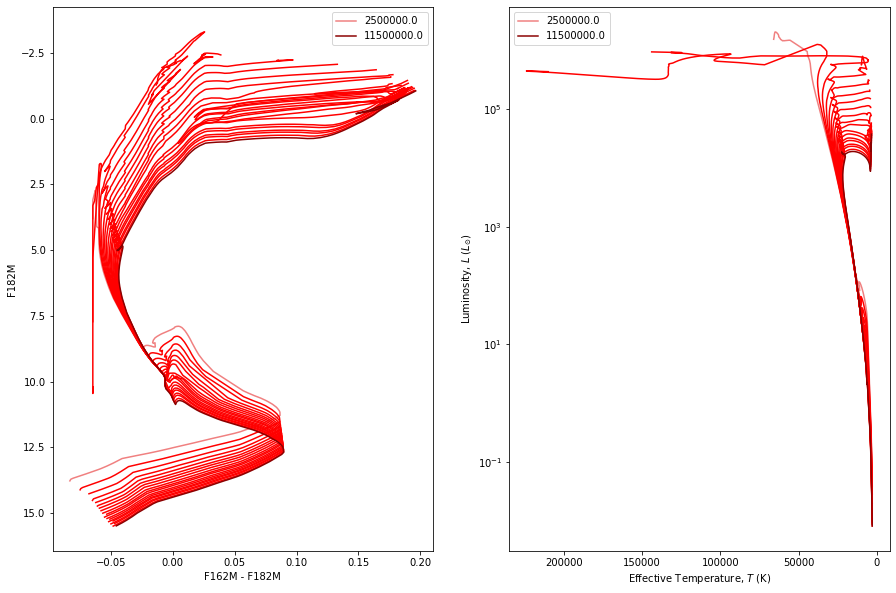

In [14]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 2:
    idx_arr = idx_arr[::2]

'''
label_arr = np.empty(len(idx_arr))
for i in range(len(idx_arr)):
    label_arr[i] = (idx_arr[i] / 2) + 1
    
color_arr = ["lightcoral", "indianred", "firebrick", "maroon", "darkred"]
'''
   
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F162M - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

# Plot HR
py.subplot(1, 2, 2)
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    if i == 0:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'darkred', label=level_age_arr[i])
    else:    
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'red', label='')
    
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()

py.legend()

In [51]:
import interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
skip = [264, 334, 1822, 2863]
for i in range(len(stars)):
    if i in skip:
        continue
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)

# convert luminosity values to solar luminosities
for i in range(len(stars)):
    if i in skip:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun

# print(stars)

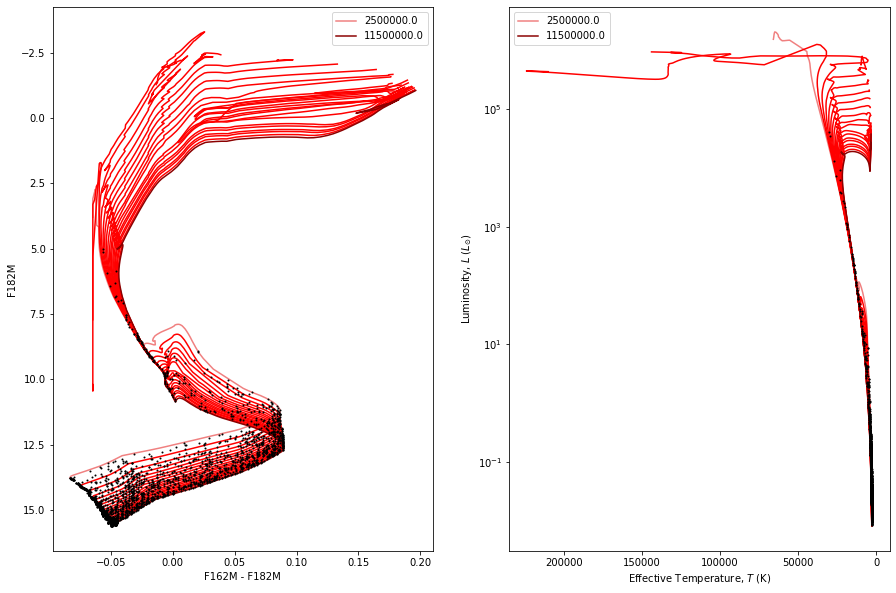

In [55]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F162M - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if i in skip:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
py.xlabel('F162M - F182M')
py.ylabel('F182M')

# Plot HR
py.subplot(1, 2, 2)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    if i == 0:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'darkred', label=level_age_arr[i])
    else:    
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'red', label='')
    
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()

for i in range(len(stars)):
    if i in skip:
        continue
    py.plot(stars[i][1], stars[i][0], marker='o', markersize=1, color='k')

py.legend()